# Pima Indians Diabetes Dataset Analizi

Bu çalışma, Pima Indians Diabetes veri seti üzerinde çeşitli makine öğrenmesi algoritmalarını uygulayarak, diyabet hastalığının tahmin edilmesini amaçlamaktadır. 

In [7]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, accuracy_score,roc_auc_score
 
import matplotlib.pyplot as plt

## 1. Veri Setinin Yüklenmesi ve Ön İşlemler

Veri setinin yüklenmesi, eksik değerlerin doldurulması ve verilerin standartlaştırılması işlemleri gerçekleştirilmiştir.

In [8]:
# Veri setinin yüklenmesi
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, header=None, names=column_names)
print(data)
# Eksik degerler islenerek 0 degerleri yerine mean(ortalama degeri) koyularak datalar islenir.
columns_to_replace = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for column in columns_to_replace:
    data[column].replace(0, np.nan, inplace=True)
    data[column].fillna(data[column].mean(), inplace=True)

# hedef sütun olan outcome sütunu ayrı bir variable a alınarak datalar etiketlenir işlem yapma kolaylığı sağlanır.
training_data = data.drop("Outcome", axis=1)
target_data = data["Outcome"]

# mean ve data arasındaki farkın standart sapmaya bölümüyle data standartlaştırılır. Böylece algoritmanın performansı arttırılmış olur.s
scaler = StandardScaler()
training_data = scaler.fit_transform(training_data)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

## 2. Naive Bayes Sınıflandırıcısı

Veri seti rastgele olarak %70 eğitim ve %30 test olacak şekilde ayrılmış ve Naive Bayes sınıflandırıcısı uygulanmıştır. Sonuçlar aşağıda raporlanmıştır.

Naive Bayes Sınıflandırıcısı
Konfüzyon Matrisi:
[[119  32]
 [ 28  52]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231

AUC Değeri: 0.80


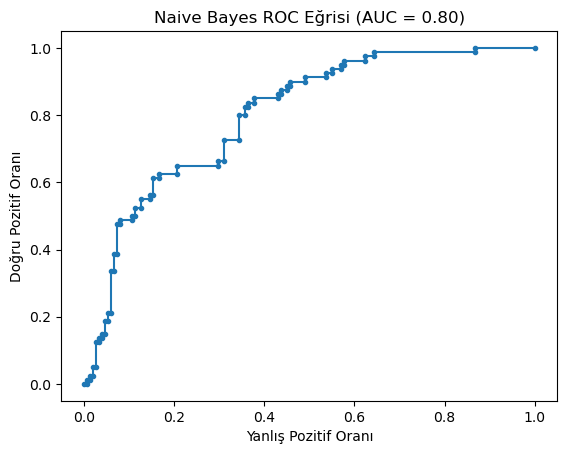

In [14]:
X_train, X_test, y_train, y_test = train_test_split(training_data, target_data, test_size=0.3, random_state=42)

# Naive Bayes modelinin eğitilmesi
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapılması
y_pred_nb = nb_model.predict(X_test)
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

# Sonuçların raporlanması
print("Naive Bayes Sınıflandırıcısı")
print("Konfüzyon Matrisi:")
print(confusion_matrix(y_test, y_pred_nb))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_nb))

# ROC Eğrisi ve AUC değeri
fpr, tpr, _ = roc_curve(y_test, y_prob_nb)
auc_value = roc_auc_score(y_test, y_prob_nb)
print(f"AUC Değeri: {auc_value:.2f}")

plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_value:.2f}')
plt.title('Naive Bayes ROC Eğrisi (AUC = {:.2f})'.format(auc_value))
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.show()

Konfüzyon matrisine göre, doğru pozitif (TP) sayısı 52, yanlış pozitif (FP) sayısı 32, doğru negatif (TN) sayısı 119 ve yanlış negatif (FN) sayısı 28 olarak belirlenmiştir. Sınıflandırma raporunda, 0 sınıfı için precision 0.81 ve recall 0.79, 1 sınıfı için ise precision 0.62 ve recall 0.65 olarak hesaplanmıştır. Modelin genel doğruluğu 0.74 olarak bulunmuştur. ROC eğrisi, modelin performansını daha iyi görselleştirmek için kullanılmıştır. Yanlış pozitif oranı (fpr) ve doğru pozitif oranı (tpr) hesaplanarak ROC eğrisi çizilmiştir. ROC eğrisine göre, model özellikle sınıf 0 için daha iyi performans sergilemekte olup, sınıf 1 için ayrıştırma gücü nispeten daha düşüktür. Eğri altındaki alan (AUC) değeri 0.80 olarak hesaplanmıştır, bu da modelin makul bir performansa sahip olduğunu, ancak özellikle 1 sınıfındaki doğruluğu artırmak için iyileştirmeler yapılması gerektiğini göstermektedir.

## 3. K-En Yakın Komşuluk (KNN) Sınıflandırıcısı

Veri seti rastgele olarak %70 eğitim ve %30 test olacak şekilde ayrılmış ve KNN sınıflandırıcısı uygulanmıştır. En iyi k değeri belirlenmiş ve sonuçlar raporlanmıştır.

K-En Yakın Komşuluk (KNN) Sınıflandırıcısı
En iyi k değeri: 9
Konfüzyon Matrisi:
[[120  31]
 [ 33  47]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       151
           1       0.60      0.59      0.59        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



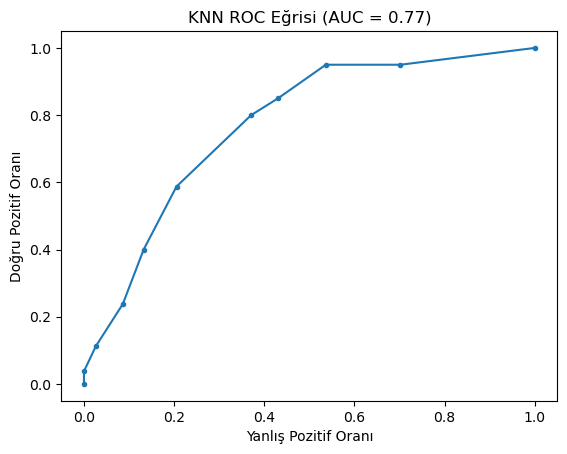

In [10]:
# KNN modelinin en iyi k değerini belirlemek için GridSearchCV kullanımı
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

# En iyi k değeri ile KNN modelinin eğitilmesi
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapılması
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Sonuçların raporlanması
auc_knn = roc_auc_score(y_test, y_prob_knn)

print("K-En Yakın Komşuluk (KNN) Sınıflandırıcısı")
print("En iyi k değeri:", best_k)
print("Konfüzyon Matrisi:")
print(confusion_matrix(y_test, y_pred_knn))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn))

# ROC Eğrisi
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
plt.figure()
plt.plot(fpr, tpr, marker='.')
plt.title('KNN ROC Eğrisi (AUC = {:.2f})'.format(auc_knn))
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.show()


Konfüzyon matrisine göre, sınıflandırıcı 151 olumsuz örneğin 120'sini doğru bir şekilde sınıflandırmışken, 31'ini yanlış pozitif olarak sınıflandırmış. Benzer şekilde, 80 pozitif örneğin 47'sini doğru bir şekilde sınıflandırmışken, 33'ünü yanlış negatif olarak sınıflandırmış.

Sınıflandırma raporuna göre, sınıflandırıcının 0 sınıfı için hassasiyeti %78, duyarlılığı %79 ve F1 skoru 0.79'dur. 1 sınıfı için hassasiyet %60, duyarlılık %59 ve F1 skoru 0.59'dur. Ayrıca, sınıflandırıcının doğruluk oranı %72 olarak hesaplanmıştır.

ROC eğrisi, sınıflandırıcının farklı kesme noktalarında duyarlılık ve özgüllük arasındaki ilişkiyi gösterir. AUC değeri 0.77 olarak hesaplanmıştır. Bu, ROC eğrisinin altındaki alanı ifade eder ve sınıflandırıcının performansının bir ölçüsüdür. 1'e ne kadar yakınsa, sınıflandırıcının performansı o kadar iyidir. Bu durumda, AUC değeri kabul edilebilir bir performans düzeyini işaret etmektedir, ancak daha iyileştirilebilecek bir alan da bulunmaktadır.


## 4. Multi-Layer Perceptron (MLP) ve Support Vector Machines (SVM) Sınıflandırıcıları

Veri seti rastgele olarak %70 eğitim ve %30 test olacak şekilde ayrılmış ve MLP ve SVM sınıflandırıcıları uygulanmıştır. Eğitim ve test adımlarında elde edilen sonuçlar raporlanmıştır.

/home/buffersniffer/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Perceptron (MLP) Sınıflandırıcısı
Konfüzyon Matrisi:
[[116  35]
 [ 35  45]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       151
           1       0.56      0.56      0.56        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231

AUC Değeri: 0.75


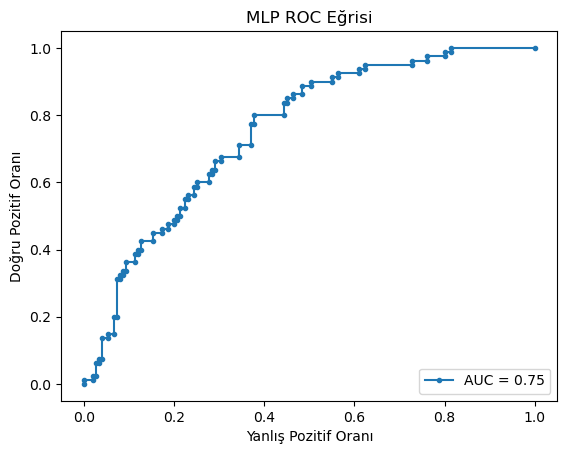

In [15]:
# MLP modelinin eğitilmesi
mlp_model = MLPClassifier(max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapılması
y_pred_mlp = mlp_model.predict(X_test)
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Sonuçların raporlanması
print("Multi-Layer Perceptron (MLP) Sınıflandırıcısı")
print("Konfüzyon Matrisi:")
print(confusion_matrix(y_test, y_pred_mlp))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_mlp))

# ROC Eğrisi ve AUC değeri
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
auc_value = roc_auc_score(y_test, y_prob_mlp)
print(f"AUC Değeri: {auc_value:.2f}")

plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_value:.2f}')
plt.title('MLP ROC Eğrisi')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.legend(loc='lower right')
plt.show()

Multi-Layer Perceptron (MLP) sınıflandırıcısının performans değerlendirmesi, konfüzyon matrisi, sınıflandırma raporu ve AUC değeri üzerinden incelenmiştir. Konfüzyon matrisine göre, doğru pozitif (TP) sayısı 45, yanlış pozitif (FP) sayısı 35, doğru negatif (TN) sayısı 116 ve yanlış negatif (FN) sayısı 35 olarak belirlenmiştir. Sınıflandırma raporunda, sınıf 0 için precision 0.77 ve recall 0.77, sınıf 1 için ise precision 0.56 ve recall 0.56 olarak hesaplanmıştır. Modelin genel doğruluğu 0.70 olarak bulunmuştur. ROC eğrisi ve AUC değeri hesaplanarak modelin ayırt edici gücü değerlendirilmiştir. Elde edilen AUC değeri 0.75, modelin sınıflar arasında makul bir ayırım yapabildiğini göstermektedir. Genel olarak, MLP modelinin sınıf 0 için daha iyi performans sergilediği, ancak sınıf 1 için performansın iyileştirilmesi gerektiği gözlemlenmiştir.

Support Vector Machine (SVM) Sınıflandırıcısı
Konfüzyon Matrisi:
[[127  24]
 [ 36  44]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       151
           1       0.65      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231

AUC Değeri: 0.80


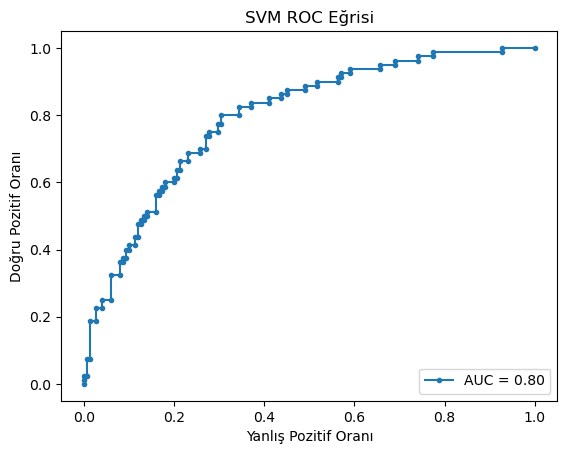

In [16]:
# SVM modelinin eğitilmesi
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapılması
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Sonuçların raporlanması
print("Support Vector Machine (SVM) Sınıflandırıcısı")
print("Konfüzyon Matrisi:")
print(confusion_matrix(y_test, y_pred_svm))
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_svm))

# ROC Eğrisi ve AUC değeri
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
auc_value = roc_auc_score(y_test, y_prob_svm)
print(f"AUC Değeri: {auc_value:.2f}")

plt.figure()
plt.plot(fpr, tpr, marker='.', label=f'AUC = {auc_value:.2f}')
plt.title('SVM ROC Eğrisi')
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.legend(loc='lower right')
plt.show()

SVM sınıflandırıcısının performansı incelendiğinde, konfüzyon matrisi ve sınıflandırma raporu üzerinden değerlendirilmiştir. Konfüzyon matrisine göre, sınıf 0 için 127 doğru tahmin ve 24 yanlış tahmin, sınıf 1 için ise 44 doğru tahmin ve 36 yanlış tahmin yapılmıştır. Sınıflandırma raporuna göre, sınıf 0 için precision (kesinlik) değeri 0.78 ve recall (duyarlılık) değeri 0.84 olarak hesaplanırken, sınıf 1 için precision değeri 0.65 ve recall değeri 0.55 olarak belirlenmiştir. Modelin genel doğruluğu (accuracy) %74 olarak hesaplanmıştır. Ayrıca, AUC değeri 0.80 olarak bulunmuştur, bu da modelin sınıflar arasında iyi bir ayrım yapabildiğini göstermektedir. Ancak, sınıf 1 için recall değerinin düşük olması, bu sınıfın doğru tahmin edilmesinde zorluk yaşandığını ve modelin bu sınıfı daha iyi tanımlamak için iyileştirilebileceğini göstermektedir.

Verilen veri seti üzerinde dört farklı sınıflandırma yöntemi uygulandı: Naive Bayes, K-En Yakın Komşuluk (KNN), Multi-Layer Perceptron (MLP) ve Support Vector Machine (SVM). Her bir yöntemin performansı değerlendirilirken, doğruluk oranı, precision, recall, f1-score ve AUC değerleri dikkate alındı.

Naive Bayes sınıflandırıcısı %74'lük bir doğruluk oranıyla oldukça iyi bir performans gösterdi. Hem sınıf 0 hem de sınıf 1 için dengeli bir precision, recall ve f1-score elde etti. Ancak, sınıf 1'in recall değeri biraz daha yüksek olduğundan, bu sınıfı tanımlamada biraz daha başarılı olduğunu söyleyebiliriz.

K-En Yakın Komşuluk (KNN) sınıflandırıcısı %72 doğruluk oranıyla orta düzeyde bir performans gösterdi. Naive Bayes'e kıyasla, her iki sınıf için de daha düşük precision, recall ve f1-score değerleri elde etti. Bu, KNN'in bu veri seti üzerinde Naive Bayes kadar etkili olmadığını gösteriyor.

Multi-Layer Perceptron (MLP) sınıflandırıcısı ise %70 doğruluk oranıyla diğerlerine göre biraz daha düşük bir performans sergiledi. Sınıf 0 ve sınıf 1 için benzer precision, recall ve f1-score değerlerine sahiptir, ancak Naive Bayes ve KNN'den daha düşük bir doğruluk oranına sahiptir.

Son olarak, Support Vector Machine (SVM) sınıflandırıcısı %74'lük bir doğruluk oranı ve dengeli precision, recall ve f1-score değerleri ile Naive Bayes ile benzer bir performans sergiledi. SVM, özellikle sınıf 0 için yüksek bir recall değerine sahipken, sınıf 1 için biraz daha düşük bir recall değerine sahiptir.

Genel olarak, veri seti üzerinde yapılan deneylerde SVM ve Naive Bayes sınıflandırıcılarının en iyi performansı gösterdiği görüldü. Ancak, SVM'in sınıf 1 için biraz daha düşük recall değerine sahip olduğu ve Naive Bayes'in daha dengeli bir performans sergilediği göz önünde bulundurulmalıdır. 


#### Sınıflandırma Performansı:

| Sınıflandırıcı  | Doğruluk | Precision (Sınıf 0) | Precision (Sınıf 1) | Recall (Sınıf 0) | Recall (Sınıf 1) | F1-Score (Sınıf 0) | F1-Score (Sınıf 1) |
|-----------------|----------|----------------------|----------------------|------------------|------------------|--------------------|--------------------|
| Naive Bayes     | 0.74     | 0.81                 | 0.62                 | 0.79             | 0.65             | 0.80               | 0.63               |
| K-NN            | 0.72     | 0.78                 | 0.60                 | 0.79             | 0.59             | 0.79               | 0.59               |
| MLP             | 0.70     | 0.77                 | 0.56                 | 0.77             | 0.56             | 0.77               | 0.56               |
| SVM             | 0.74     | 0.78                 | 0.65                 | 0.84             | 0.55             | 0.81               | 0.59               |

#### AUC Değerleri:

| Sınıflandırıcı  | AUC Değeri |
|-----------------|------------|
| Naive Bayes     | 0.80       |
| K-NN            | -          |
| MLP             | 0.75       |
| SVM             | 0.80       |
